**Files imported**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

**Reading datafile**

In [3]:
ar_data = pd.read_csv("Arrhythmia_cmplt.csv",na_values={
    'J':['?'],
    'T':['?'],
    'P':['?'],
    'QRST':['?'],
    'Heart rate':['?']})

In [4]:
ar_data.head()

,Unnamed: 0,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,0,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,1,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,2,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,3,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,4,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [5]:
ar_data = ar_data.drop(columns='Unnamed: 0')

In [6]:
ar_data.shape

(452, 280)

**Replacing missing values**

In [7]:
ar_data.replace(0,np.NaN)

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,75.0,NaN,190,80,91,193.0,371,174,121.0,-16.0,...,NaN,9.0,-0.9,NaN,NaN,0.9,2.9,23.3,49.4,8
1,56.0,1.0,165,64,81,174.0,401,149,39.0,25.0,...,NaN,8.5,NaN,NaN,NaN,0.2,2.1,20.4,38.8,6
2,54.0,NaN,172,95,138,163.0,386,185,102.0,96.0,...,NaN,9.5,-2.4,NaN,NaN,0.3,3.4,12.3,49.0,10
3,55.0,NaN,175,94,100,202.0,380,179,143.0,28.0,...,NaN,12.2,-2.2,NaN,NaN,0.4,2.6,34.6,61.6,1
4,75.0,NaN,190,80,88,181.0,360,177,103.0,-16.0,...,NaN,13.1,-3.6,NaN,NaN,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160,70,80,199.0,382,154,117.0,-37.0,...,NaN,4.3,-5.0,NaN,NaN,0.7,0.6,-4.4,-0.5,1
448,37.0,NaN,190,85,100,137.0,361,201,73.0,86.0,...,NaN,15.6,-1.6,NaN,NaN,0.4,2.4,38.0,62.4,10
449,36.0,NaN,166,68,108,176.0,365,194,116.0,-85.0,...,NaN,16.3,-28.6,NaN,NaN,1.5,1.0,-44.2,-33.2,2
450,32.0,1.0,155,55,93,106.0,386,218,63.0,54.0,...,-0.4,12.0,-0.7,NaN,NaN,0.5,2.4,25.0,46.6,1


In [8]:
ar_data.fillna(ar_data.mean(),inplace=True)

In [9]:
ar_data.isnull().sum()

Age                   0
Sex                   0
Height                0
Weight                0
QRS duration          0
                     ..
V6_P.milivolt wave    0
V6_T.milivolt wave    0
V6_QRSA.milivolt      0
V6_QRSTA.milivolt     0
Class Distribution    0
Length: 280, dtype: int64

In [10]:
ar_data.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


**Data Description**

In [11]:
ar_data.describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


**Correlation matrix**

In [12]:
ar_data.corr()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
Age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
Sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
Height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
Weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
QRS duration,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6_P.milivolt wave,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,-0.085446,-0.008013,-0.092069,-0.019946,NaN,1.000000,-0.043307,-0.069852,-0.064171,-0.086427
V6_T.milivolt wave,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.116959,0.093749,-0.072408,-0.017690,NaN,-0.043307,1.000000,-0.124004,0.687877,-0.030798
V6_QRSA.milivolt,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.002630,0.671383,0.562825,-0.051131,NaN,-0.069852,-0.124004,1.000000,0.611219,0.003476
V6_QRSTA.milivolt,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.082538,0.560374,0.341484,-0.049667,NaN,-0.064171,0.687877,0.611219,1.000000,-0.009275


**Splitting dataset into input(x) and target(y)**

In [13]:
x = ar_data.drop(columns=['Class Distribution'])
y = ar_data['Class Distribution']

**Feature selection using feature_importance with ExtraTreesClassifier**

In [14]:
modele = ExtraTreesClassifier()
modele.fit(x,y)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [15]:
ft_imp = pd.Series(modele.feature_importances_,index = x.columns)
print(ft_imp.nlargest(20))

V1.msec-R_ wave                            0.025458
V1.msec-Number of intrinsic deflections    0.023777
Heart rate                                 0.021877
AVR_T.milivolt wave                        0.019175
V6_T.milivolt wave                         0.016063
T interval                                 0.013054
AVF_Q.milivolt wave                        0.012585
V3_QRSTA.milivolt                          0.012584
V4_T.milivolt wave                         0.012492
V1.msec-S wave                             0.012045
AVL_T.milivolt wave                        0.012027
V5_T.milivolt wave                         0.011878
V3_Q.milivolt wave                         0.011865
V1_JJ.milivolt wave                        0.010906
V2.msec-S wave                             0.010857
QRS duration                               0.010477
S.milivolt wave                            0.010135
AVR_QRSTA.milivolt                         0.010126
V1_R_.milivolt wave                        0.009958
V4_JJ.milivo

C:\Users\vishn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


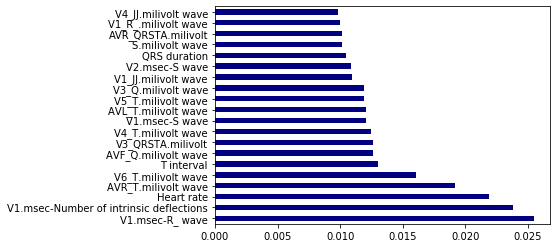

In [16]:
ft_imp.nlargest(20).plot(kind='barh',colors = 'Navy');

**Train-Test Split**

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

stdsclr = StandardScaler()
x_train_std = stdsclr.fit_transform(x_train)
x_test_std = stdsclr.fit_transform(x_test)

In [18]:
x_train_std.shape

(302, 279)

In [19]:
y_test.shape

(150,)

**SVM Classifier to find accuracy of model**

In [22]:
models = SVC()
models.fit(x_train_std,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
models.score(x_test_std,y_test)

0.5866666666666667

**Tuning**

In [27]:
models = SVC(C=5)
models.fit(x_train_std,y_train)
models.score(x_test_std,y_test)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6866666666666666